<a href="https://colab.research.google.com/github/ppnandagawali01/LogisticRegression/blob/main/LogisiticsRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Get the Data

In [3]:
from google.colab import files
uploaded = files.upload()

Saving gender_submission.csv to gender_submission.csv
Saving test.csv to test.csv
Saving train.csv to train.csv


In [4]:
gender_data = pd.read_csv('gender_submission.csv')
test_data = pd.read_csv('test.csv')
train_data = pd.read_csv('train.csv')

In [5]:
gender_data.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [6]:
gender_data.describe()

,PassengerId,Survived
count,418.000000,418.000000
mean,1100.500000,0.363636
std,120.810458,0.481622
min,892.000000,0.000000
25%,996.250000,0.000000
50%,1100.500000,0.000000
75%,1204.750000,1.000000
max,1309.000000,1.000000


In [7]:
gender_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [8]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [12]:
print(train_data)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

Exploratory Data Analysis

<Axes: xlabel='Survived', ylabel='count'>

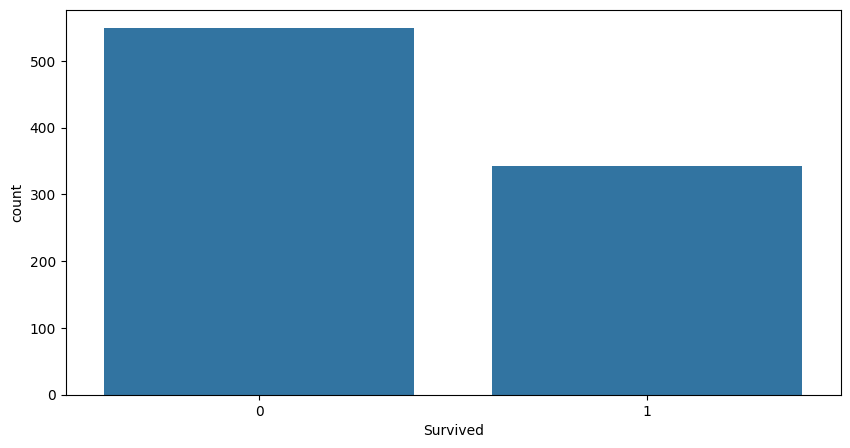

In [13]:
plt.figure(figsize=(10,5))
sns.countplot(x='Survived', data=train_data)

<Axes: xlabel='Survived', ylabel='count'>

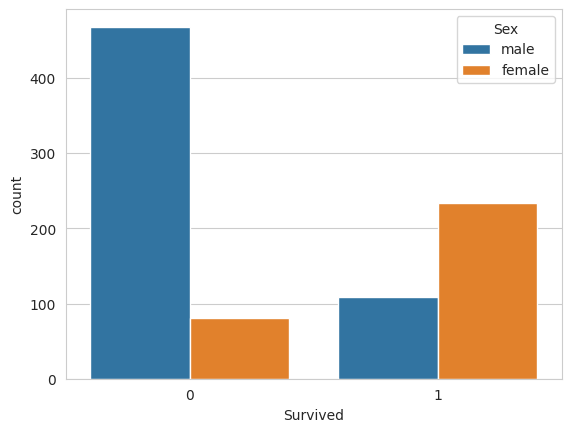

In [14]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Sex', data=train_data)

<Axes: >

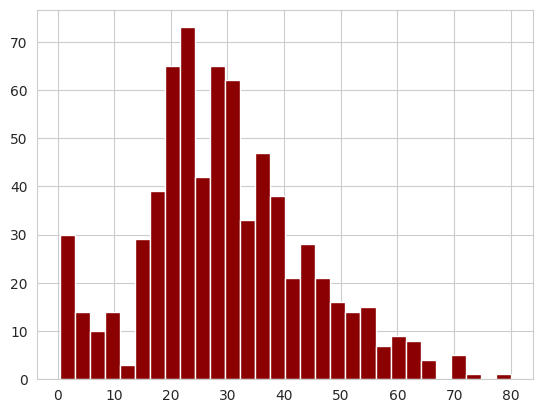

In [19]:
train_data['Age'].hist(bins=30, color='darkred', alpha=1.0)


In [16]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Women Survival Rate

In [33]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)
print("% of women survived are", rate_women)

% of women survived are 0.7420382165605095


Male Survival Rate

In [35]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)
print("% of men survived are", rate_men)

% of men survived are 0.18890814558058924


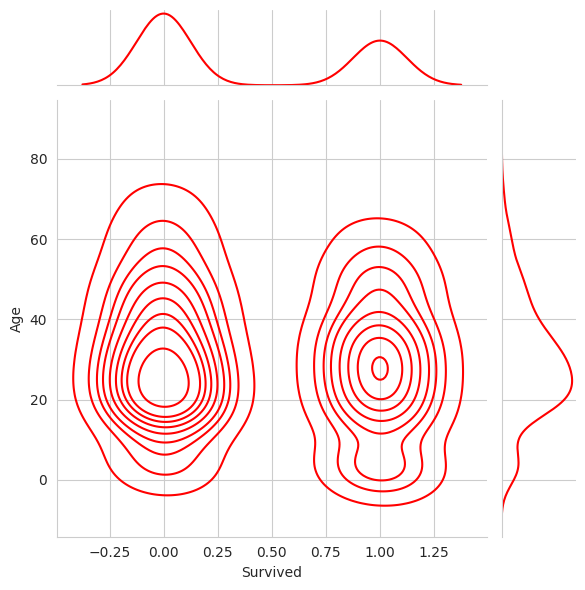

In [38]:
sns.jointplot(x='Survived',y='Age', data=train_data, color='red',kind='kde')

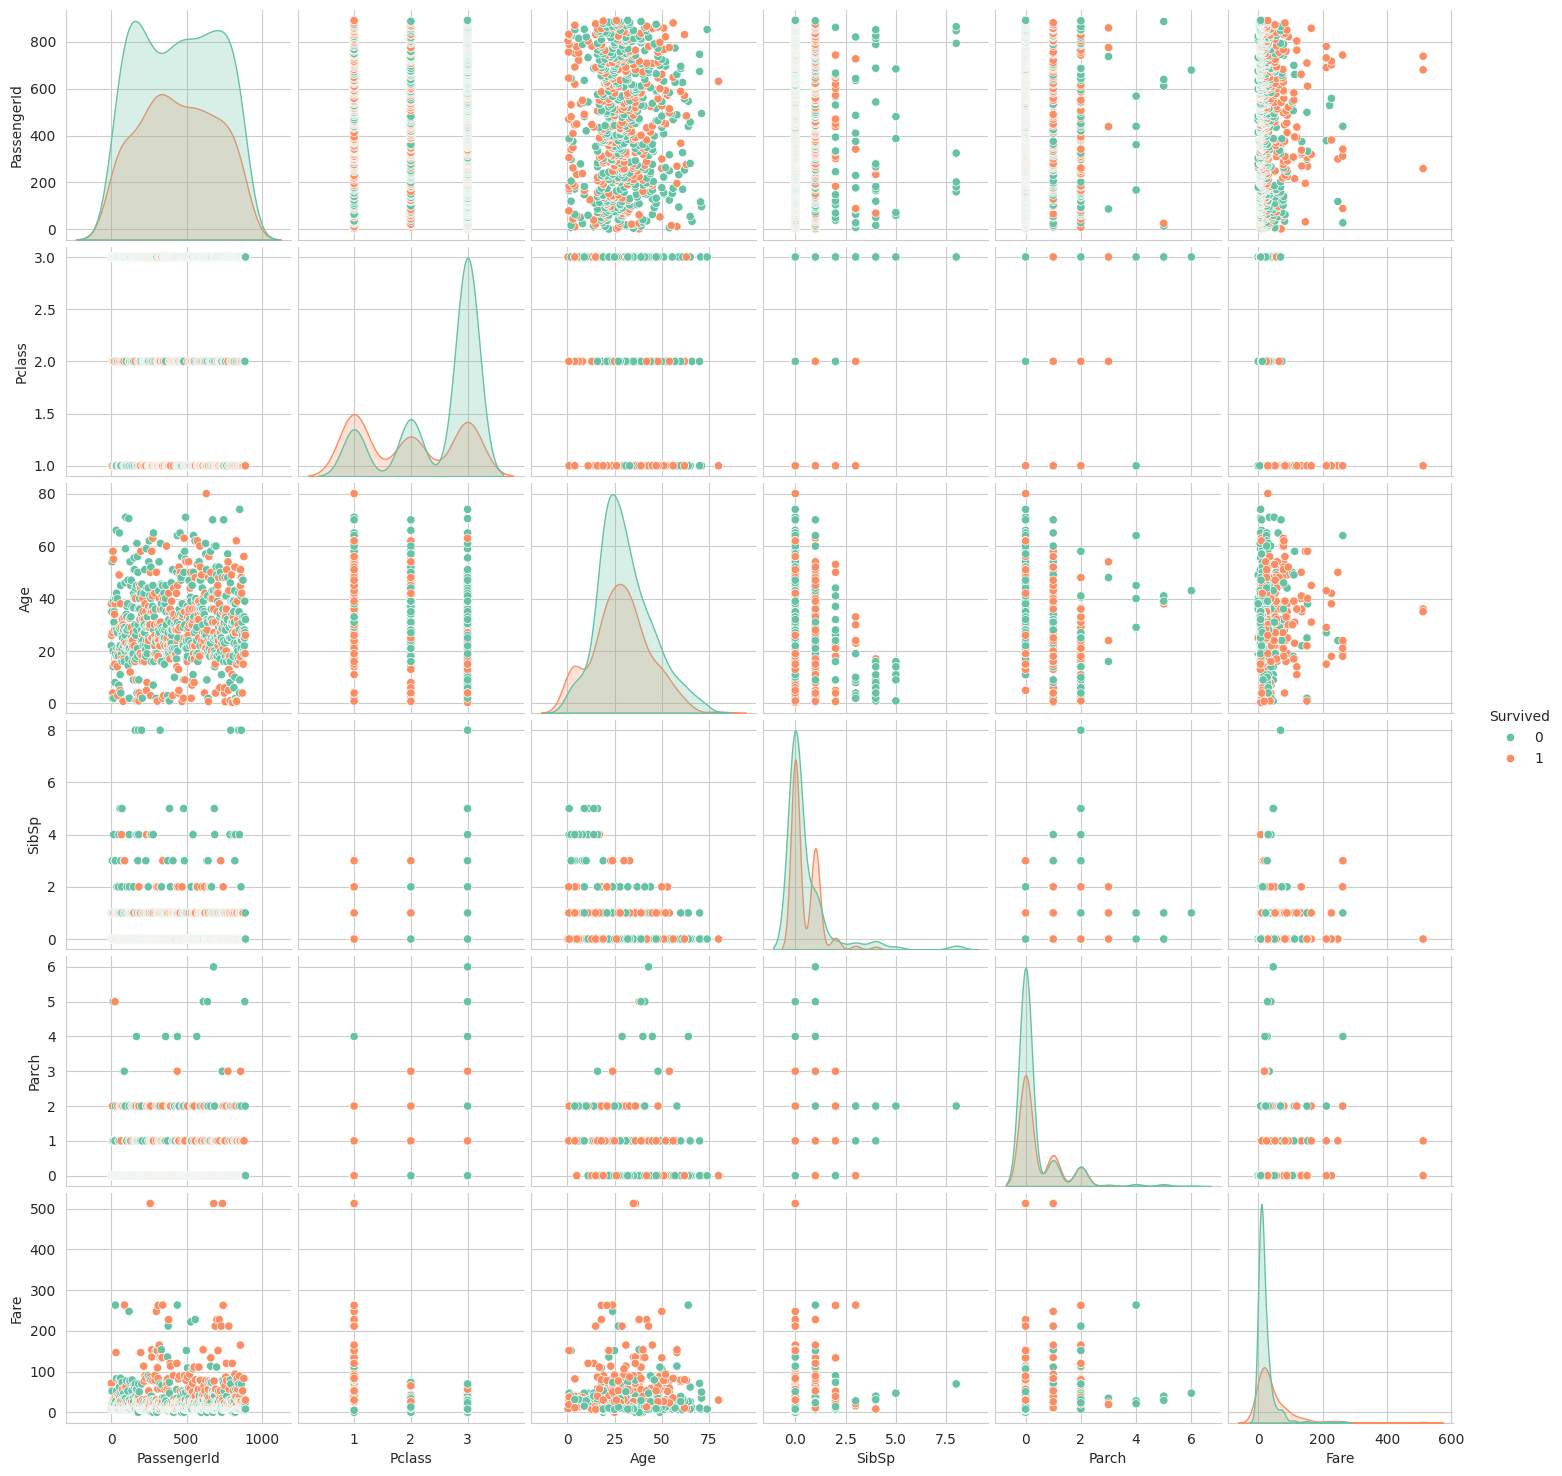

In [39]:
sns.pairplot(train_data, hue='Survived', palette='Set2')

Logistics Regression

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [43]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [54]:
X_train=train_data[['Pclass','Age', 'SibSp','Parch']]
Y_train=train_data[['Survived']]

In [51]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Handling Null Values in Age

In [85]:
f=train_data["Age"].isnull().any()
print(f)

False


In [77]:
train_data[train_data["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [74]:
train_data["Age"]=train_data["Age"].fillna(0)

In [75]:
test_data["Age"]=test_data["Age"].fillna(0)

In [78]:
lr = LogisticRegression()

In [79]:
model=lr.fit(X_train,Y_train)

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [86]:
from sklearn.ensemble import HistGradientBoostingClassifier

In [87]:
model = HistGradientBoostingClassifier()

In [88]:
model = model.fit(X_train, Y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Prediction & Evaluation

In [91]:
predictions = model.predict(test_data[['Pclass','Age', 'SibSp','Parch']])

In [92]:
print(predictions)

[0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 1 1 1 1 0 1 0 1 1 0 0 0 1 1 0 1
 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 1 1 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1
 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0
 1 0 1 1 0 0 0 0 1 0 1 1 1 1 0 1 1 0 1 0 1 0 1 1 0 1 0 1 0 1 1 0 0 1 1 1 0
 1 1 0 0 1 0 1 0 0 1 0 1 0 0 1 1 1 0 1 0 1 0 0 1 0 0 1 1 0 0 1 1 1 1 1 0 0
 0 0 0 1 0 1 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 1 1 1 0 1 0 1 1 0 1 0 0 1 1 0 0
 0 0 0 1 1 0 1 1 1 1 0 0 1 1 1 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 0
 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1
 0 1 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 1 0 0 1 0 1 1 1 1 0 1 1
 0 1 1 1 1 0 0 0 0 1 1 0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0 1 1 0 0 0
 1 1 1 1 1 0 1 0 0 1 1]


In [99]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived':predictions})
output.to_csv('submission.csv', index=False)
print("File generated")

File generated
